# Chapter 12. Question 10.
## In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

## (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [58]:
np.random.seed(42)

n_observations = 20
n_variables = 50
n_classes = 3

data = []
for class_id in range(n_classes):
  mean_shift = class_id  # Add a mean shift for each class
  class_data = np.random.normal(loc=mean_shift, scale=1, size=(n_observations, n_variables))
  data.append(class_data)

X = np.concatenate(data)
y_true = np.array([0] * n_observations + [1] * n_observations + [2] * n_observations)

print(X.shape)

(60, 50)


## (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a diferent color to indicate the observations in each of the three classes.
### If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the frst two principal component score vectors.

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

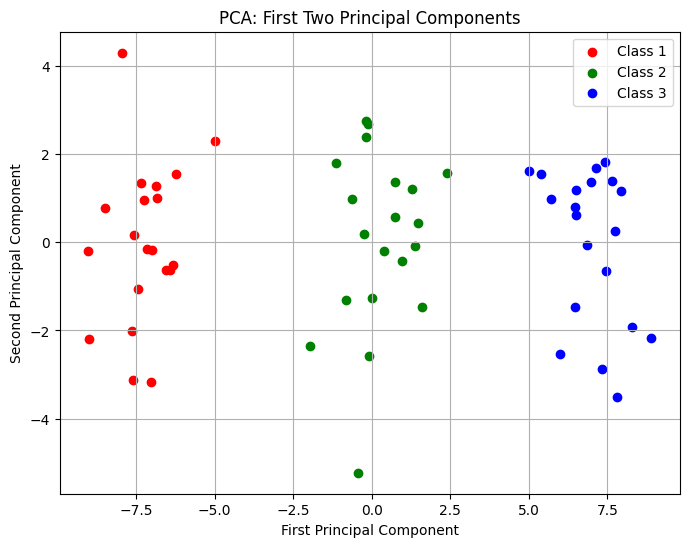

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_true == 0, 0], X_pca[y_true == 0, 1], color='red', label='Class 1')
plt.scatter(X_pca[y_true == 1, 0], X_pca[y_true == 1, 1], color='green', label='Class 2')
plt.scatter(X_pca[y_true == 2, 0], X_pca[y_true == 2, 1], color='blue', label='Class 3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()

## (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [61]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X)

comparison_3 = pd.crosstab(y_true, y_kmeans_3, rownames=['True Label'], colnames=['KMeans Cluster'])
print(comparison_3)

KMeans Cluster   0   1   2
True Label                
0                0   0  20
1                0  20   0
2               20   0   0


Since the K-means clustering will arbitrarily number the clusters, the true label and KMeans cluster  of 0 and 2 are absolutely opposite. Therefore, I would like to plot the actual clustering case for more information.

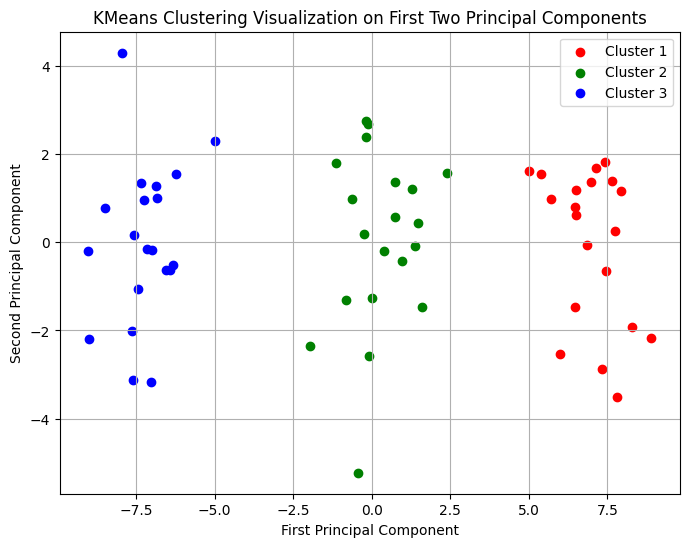

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans_3 == 0, 0], X_pca[y_kmeans_3 == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_3 == 1, 0], X_pca[y_kmeans_3 == 1, 1], color='green', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_3 == 2, 0], X_pca[y_kmeans_3 == 2, 1], color='blue', label='Cluster 3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

With the visualization of KMeans clustering result, I found that cluster 1 is related to the third class of PCA, and cluster 3 is related to the first class of PCA.

The result of KMeans cluster with K=3 is **100% correct compared with the true label**.

## (d) Perform K-means clustering with K = 2. Describe your results.

In [63]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)
comparison_2 = pd.crosstab(y_true, y_kmeans_2, rownames=['True Label'], colnames=['KMeans Cluster'])
print(comparison_2)

KMeans Cluster   0   1
True Label            
0               20   0
1               19   1
2                0  20


Lets visualize the KMeans clustering results with K=2.

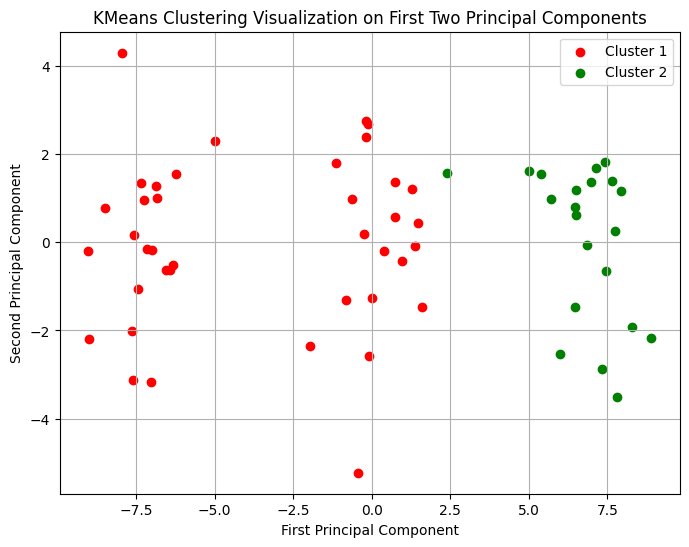

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans_2 == 0, 0], X_pca[y_kmeans_2 == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_2 == 1, 0], X_pca[y_kmeans_2 == 1, 1], color='green', label='Cluster 2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

When K is reduced from 3 to 2, **the class 2 in PCA is removed** which is understanding, since class 1 and 3 are distributed at the edge of all points (in other words, class 1 and 3 have stronger data feature than class 2 has.)


**Most data points in PCA class 2 is clustered to the PCA class 1**, which is cluster 1 in KMeans clustering with K=2. Only one point is clustered to the cluster 2.

## (e) Now perform K-means clustering with K = 4, and describe your results.

In [65]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)
comparison_4 = pd.crosstab(y_true, y_kmeans_4, rownames=['True Label'], colnames=['KMeans Cluster'])
print(comparison_4)

KMeans Cluster  0   1   2   3
True Label                   
0               0   0  20   0
1               4  16   0   0
2               0   0   0  20


Visualize the KMeans clustering results with K=4.

Since the original data has 50 variables for each observation which is hard to visualize, I will visualized with data points after PCA process.

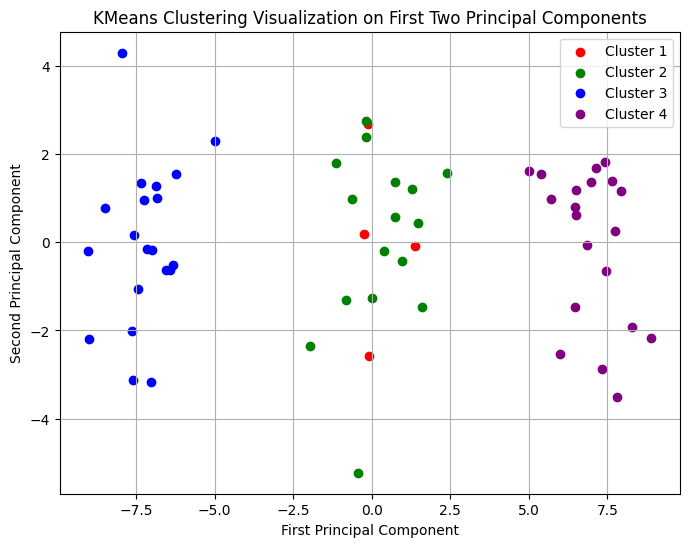

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans_4 == 0, 0], X_pca[y_kmeans_4 == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_4 == 1, 0], X_pca[y_kmeans_4 == 1, 1], color='green', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_4 == 2, 0], X_pca[y_kmeans_4 == 2, 1], color='blue', label='Cluster 3')
plt.scatter(X_pca[y_kmeans_4 == 3, 0], X_pca[y_kmeans_4 == 3, 1], color='purple', label='Cluster 4')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

When K is increased from 3 to 4, **the class 2 in PCA is divided into cluster 2 and 3, the class 3 in PCA is named to cluster 4**.


**Most data points in PCA class 2 is clustered to the PCA class 2, only a few points is clustered to the PCA class 3**. It's hard to have deeper discussion of how the data points in PCA class 2 is mostly clustered to cluster 2, instead of 3, since it is visualized in 2-dimension.

Higher dimensioinal visualization could perform relations between data points better, showing more informations.

## (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [67]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)
comparison_pca = pd.crosstab(y_true, y_kmeans_pca, rownames=['True Label'], colnames=['KMeans Cluster'])
print(comparison_pca)

KMeans Cluster   0   1   2
True Label                
0                0  20   0
1                0   0  20
2               20   0   0


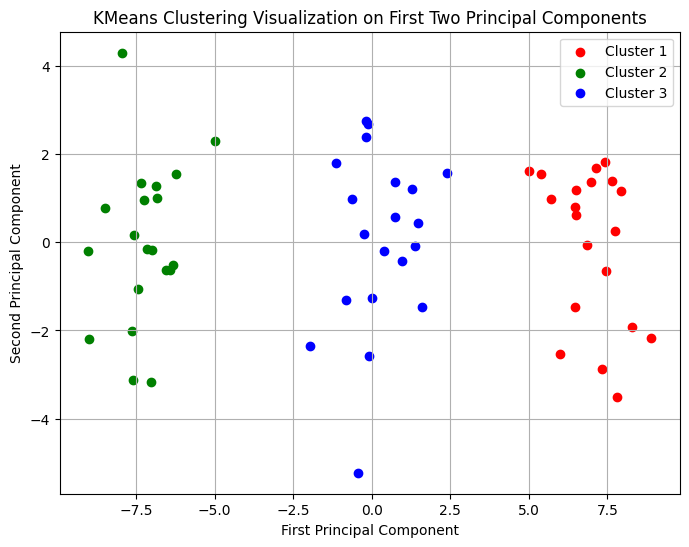

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], color='green', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], color='blue', label='Cluster 3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

Since **PCA was able to capture more structural information of the variance** of the data, it is likely to **clustered with higher accuracy**, compared with raw data.

However, the raw data has clear separation, making it hard to see the effect of clustering with K = 3 on the first two principal component score vectors, rather than raw data.

## (g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering on scaled data with K=3
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

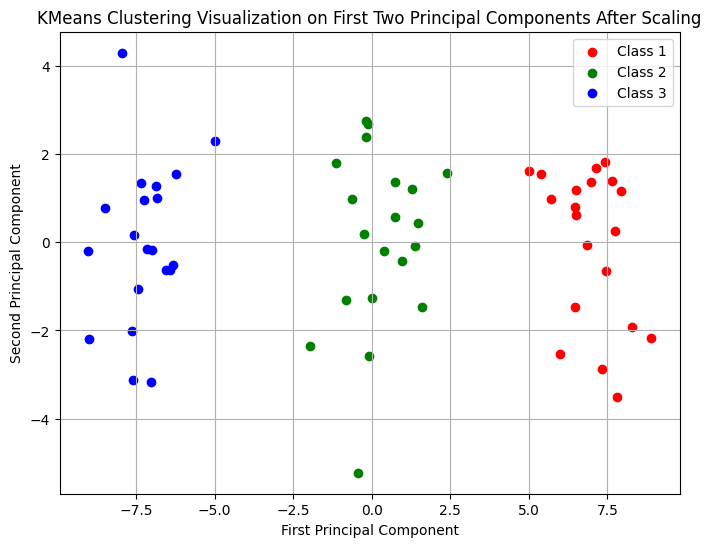

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans_scaled == 0, 0], X_pca[y_kmeans_scaled == 0, 1], color='red', label='Class 1')
plt.scatter(X_pca[y_kmeans_scaled == 1, 0], X_pca[y_kmeans_scaled == 1, 1], color='green', label='Class 2')
plt.scatter(X_pca[y_kmeans_scaled == 2, 0], X_pca[y_kmeans_scaled == 2, 1], color='blue', label='Class 3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.title('KMeans Clustering Visualization on First Two Principal Components After Scaling')
plt.show()

If the **original data had variables with different scales or variances**, scaling can result in **better cluster separation**, as all features contribute equally to the distance calculation.

If the variables already had similar scales, scaling might not make much of a difference in the clustering result.

In this case, first and second principal components have similar scale, making it hard to see the effect of clustering after scaling the data.